In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 2.9 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Colab Notebooks/Final_year_project/3_20_23.rar",outdir="/content/output")

patool: Extracting /content/drive/MyDrive/Colab Notebooks/Final_year_project/3_20_23.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Colab Notebooks/Final_year_project/3_20_23.rar"
patool:     with cwd='/content/output'
patool: ... /content/drive/MyDrive/Colab Notebooks/Final_year_project/3_20_23.rar extracted to `/content/output'.


'/content/output'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import random
import plotly.express as px

In [ ]:
class_dirs = os.listdir("/content/output/train")# list all directories inside "train" folder
class_dirs

['Abrus precatorius',
 'dieffenbachia',
 'pothos',
 'wisteria',
 'Madagascar periwinkle',
 'foxglove',
 'lily_of_the_valley',
 'oleander',
 'castor_oil_plant',
 'lilies',
 'rhubarb']

In [ ]:
image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)

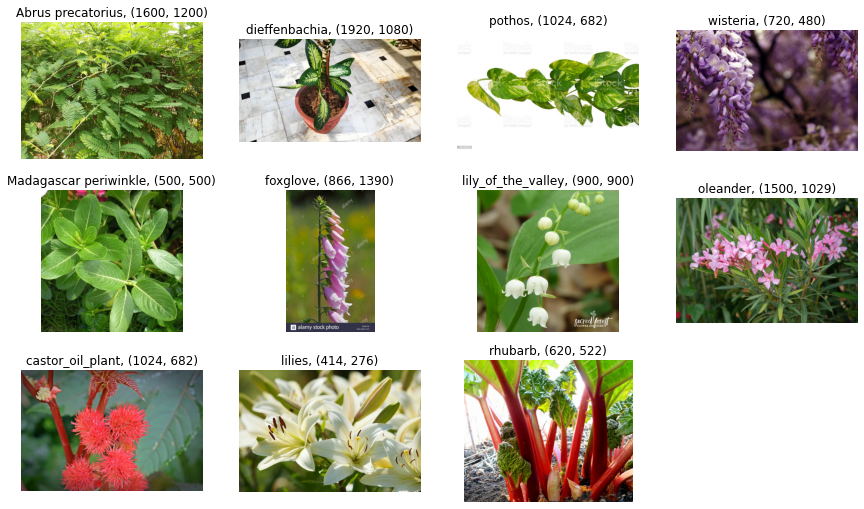

In [ ]:
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/output/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()): 
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title 
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

Count of training samples per class:
                     class  count
0       Abrus precatorius     93
1           dieffenbachia    115
2                  pothos     96
3                wisteria     92
4   Madagascar periwinkle     96
5                foxglove    104
6      lily_of_the_valley     95
7                oleander     92
8        castor_oil_plant    104
9                  lilies     80
10                rhubarb    103


<Figure size 1080x864 with 0 Axes>

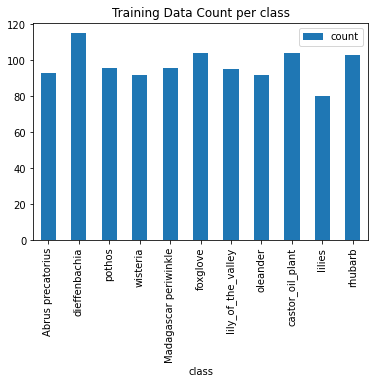

In [ ]:
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)
# draw a bar plot using pandas in-built plotting function
plt.figure(figsize=(15,12))
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class") 
plt.show()

In [ ]:
df_count_train['count'].sum()

1070

In [ ]:
train_dir=r"/content/output/train"
class_names = sorted(os.listdir(train_dir))
print(class_names)
n_classes = len(class_names)
print(n_classes)

['Abrus precatorius', 'Madagascar periwinkle', 'castor_oil_plant', 'dieffenbachia', 'foxglove', 'lilies', 'lily_of_the_valley', 'oleander', 'pothos', 'rhubarb', 'wisteria']
11


In [ ]:
len(os.listdir(str(train_dir) +'/'+ 'Abrus precatorius'))

93

In [ ]:
# Class Distribution
class_dis = [len(os.listdir(str(train_dir) +'/'+ name)) for name in class_names]
# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")


Total Number of Classes : 11 
Class Names : ['Abrus precatorius', 'Madagascar periwinkle', 'castor_oil_plant', 'dieffenbachia', 'foxglove', 'lilies', 'lily_of_the_valley', 'oleander', 'pothos', 'rhubarb', 'wisteria']


In [ ]:
fig = px.pie(names=class_names, values=class_dis, title="Training Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.49}})
fig.show()

In [ ]:
fig = px.bar(x=class_names,y=class_dis, title="Training Class Distribution", color=class_names)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [ ]:
# Class Names
valid_path = r"/content/output/val"

# Class Distribution
class_dis = [len(os.listdir(valid_path +'/' +name)) for name in class_names]

# Pie
fig = px.pie(names=class_names, values=class_dis, title="Validation Class Distribution", color=class_names, hole=0.2)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Visualize 
fig = px.bar(x=class_names, y=class_dis, color=class_names)
fig.show()


In [ ]:
# Class Names
valid_path = r"/content/output/test"

# Class Distribution
class_dis = [len(os.listdir(valid_path +'/' +name)) for name in class_names]

# Pie
fig = px.pie(names=class_names, values=class_dis, title="Test Class Distribution", color=class_names, hole=0.2)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Visualize 
fig = px.bar(x=class_names, y=class_dis, color=class_names)
fig.show()

In [ ]:
train_dir = Path("/content/output/train")
train_filepaths = list(train_dir.glob(r'**/*.*'))

In [ ]:

test_dir = Path(("/content/output/test"))
test_filepaths = list(test_dir.glob(r'**/*.*'))

val_dir = Path(("/content/output/val"))
val_filepaths = list(test_dir.glob(r'**/*.*'))

In [ ]:
train_filepaths

[PosixPath('/content/output/train/Abrus precatorius/tn_DSCF0269.JPG'),
 PosixPath('/content/output/train/Abrus precatorius/Picture-of-Abrus-precatorius-herb.jpg'),
 PosixPath('/content/output/train/Abrus precatorius/Abrus precatorius W IMG_1578.jpg'),
 PosixPath('/content/output/train/Abrus precatorius/Screenshot (365).jpg'),
 PosixPath('/content/output/train/Abrus precatorius/Abrus_precatorius_pods.jpg'),
 PosixPath('/content/output/train/Abrus precatorius/Screenshot (373).jpg'),
 PosixPath('/content/output/train/Abrus precatorius/Screenshot (361).jpg'),
 PosixPath('/content/output/train/Abrus precatorius/tn_DSCF6957.jpg'),
 PosixPath('/content/output/train/Abrus precatorius/_MG_7820s.jpg'),
 PosixPath('/content/output/train/Abrus precatorius/KLOWO_8_fullsize.jpg'),
 PosixPath('/content/output/train/Abrus precatorius/1462063787_4503ef2367.jpg'),
 PosixPath('/content/output/train/Abrus precatorius/abrus-precatorius-flower-w-tiny-ants.jpg'),
 PosixPath('/content/output/train/Abrus preca

In [ ]:
def proc_img(filepath):
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [ ]:
train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 1070

Number of different labels: 11

Labels: ['foxglove' 'wisteria' 'lily_of_the_valley' 'rhubarb' 'dieffenbachia'
 'Madagascar periwinkle' 'Abrus precatorius' 'castor_oil_plant' 'pothos'
 'oleander' 'lilies']


In [ ]:
train_df.head(5)

,Filepath,Label
0,/content/output/train/foxglove/close-up-to-flo...,foxglove
1,/content/output/train/wisteria/b07864751ba1869...,wisteria
2,/content/output/train/lily_of_the_valley/35025...,lily_of_the_valley
3,/content/output/train/rhubarb/home-grown-rhuba...,rhubarb
4,/content/output/train/dieffenbachia/Screenshot...,dieffenbachia


In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input
)


train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1066 validated image filenames belonging to 11 classes.
Found 136 validated image filenames belonging to 11 classes.
Found 136 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning:

Found 4 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning:

Found 8 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning:

Found 8 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.



In [ ]:
from tensorflow.keras.layers import Dropout
pretrained_model = tf.keras.applications.VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
  
)
inputs = pretrained_model.input

model = pretrained_model.output
model = tf.keras.layers.Flatten()(model)
model = tf.keras.layers.Dense(64, activation='relu')(model)
model = Dropout(0.5)(model)
model = tf.keras.layers.Dense(11,activation= 'softmax')(model)

# x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# outputs = tf.keras.layers.Dense(12, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=model)

for layer in pretrained_model.layers:
    layer.trainable = False


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
ckpt = ModelCheckpoint(r'/content/model/model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

estop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

lr = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3)

callbacks=[ckpt,estop,lr]

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 8,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 5.2548 - accuracy: 0.1782
Epoch 1: val_loss improved from inf to 1.92851, saving model to /content/model/model.h5
34/34 [==============================] - 33s 848ms/step - loss: 5.2548 - accuracy: 0.1782 - val_loss: 1.9285 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 2.8690 - accuracy: 0.2073
Epoch 2: val_loss did not improve from 1.92851
34/34 [==============================] - 28s 817ms/step - loss: 2.8690 - accuracy: 0.2073 - val_loss: 2.0492 - val_accuracy: 0.3162 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 2.4037 - accuracy: 0.2777
Epoch 3: val_loss improved from 1.92851 to 1.85260, saving model to /content/model/model.h5
34/34 [==============================] - 26s 756ms/step - loss: 2.4037 - accuracy: 0.2777 - val_loss: 1.8526 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 4/50
34/34 [==============================] - ETA:

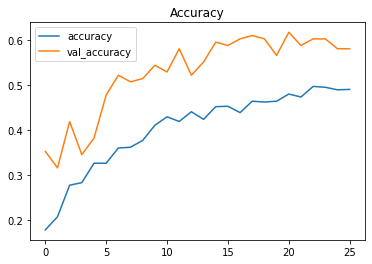

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

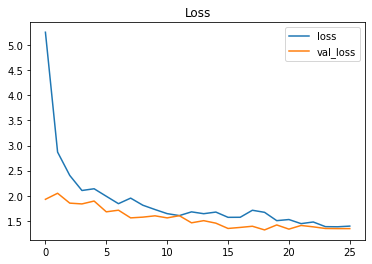

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.savefig('loss-graph.png')
plt.show()

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

5/5 [==============================] - 4s 697ms/step


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 60.29%


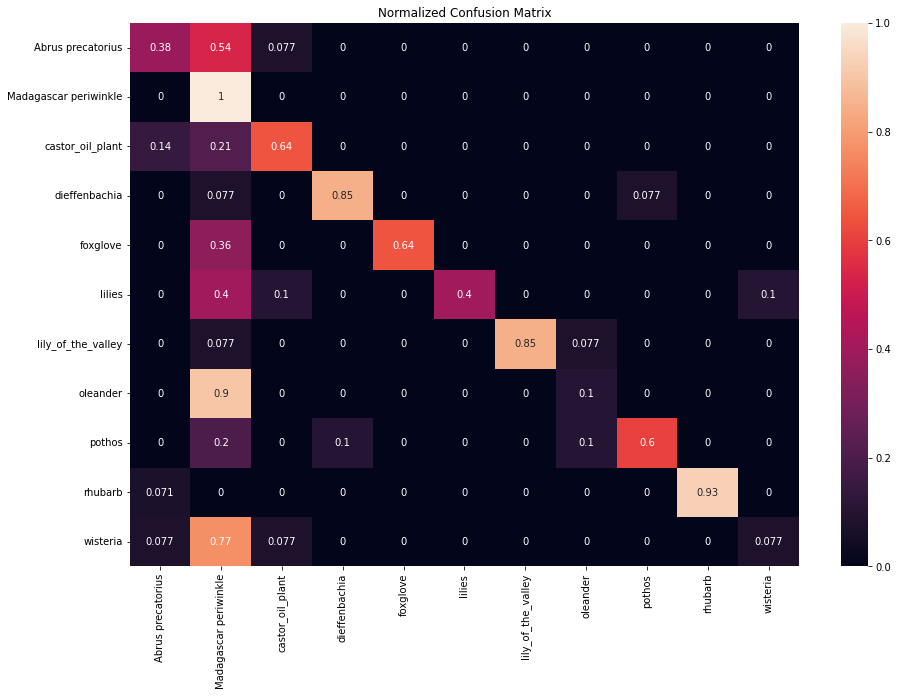

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()